<a href="https://colab.research.google.com/github/AdhishkumarT/GUVI-FP1/blob/main/fp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
file_path="/content/flight_train.csv"
df=pd.read_csv(file_path)
df.info(),df.head(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

(None,
    MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
 0      54993  11/2/2006        12/24/2008   Male         6            .   
 1      28065  2/19/2007          8/3/2007   Male         6          NaN   
 2      55106   2/1/2007         8/30/2007   Male         6            .   
 3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
 4      39546  4/10/2009         4/15/2009   Male         6      guiyang   
 
   WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
 0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
 1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
 2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
 3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
 4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   
 
    LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_

In [3]:
#Handling missing values
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])
df['WORK_CITY'] = df['WORK_CITY'].fillna("Unknown")
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].fillna("Unknown")
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].fillna("Unknown")
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].fillna(df['LAST_FLIGHT_DATE'].median())
df.isnull().sum()


,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,0
FFP_TIER,0
WORK_CITY,0
WORK_PROVINCE,0
WORK_COUNTRY,0
AGE,0
LOAD_TIME,0


In [4]:
#convert date column to datetimeformat
date_columns = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE"]
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

In [5]:
#Feature Engineering
df["CUSTOMER_TENURE"] = (df["LOAD_TIME"] - df["FIRST_FLIGHT_DATE"]).dt.days
df["SPENDING_PER_FLIGHT"] = (df["SUM_YR_1"] + df["SUM_YR_2"]) / (df["FLIGHT_COUNT"] + 1)

In [6]:
#selecting features for clustering
features = ["AGE", "FLIGHT_COUNT", "SEG_KM_SUM", "AVG_INTERVAL", "EXCHANGE_COUNT", "CUSTOMER_TENURE", "SPENDING_PER_FLIGHT"]
df_selected = df[features]

In [7]:
#Normalize feature
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_selected)

In [8]:
#Finding the optimal number of clusters[ELBOW METHOD]
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

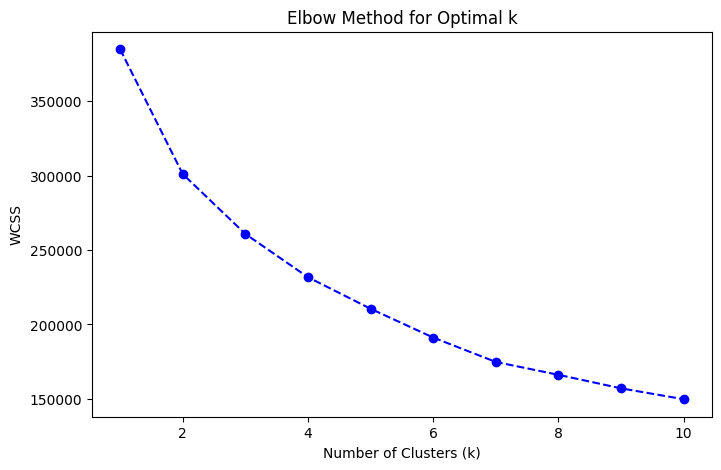

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
#Choosing Optimal K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

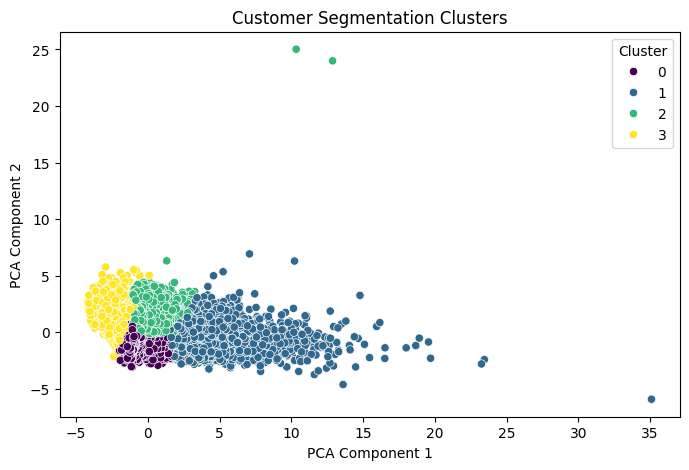

In [11]:
#Visualizing cluster using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation Clusters")
plt.show()

In [12]:
#Save the clustered data
df[["MEMBER_NO", "Cluster"]].to_csv("customer_clusters.csv", index=False)